In [6]:
!pip install fortran-magic


In [7]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

NameError: ignored

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [4]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [5]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [6]:
%%time

matmul(a, b)

CPU times: user 30 µs, sys: 5 µs, total: 35 µs
Wall time: 38.9 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.150
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.30
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [7]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [8]:
matmul(a,b)

IndexError: list index out of range

**My own example 3 - Checking the matrix multiplication compatibility condition  len(A[0]) == len(B)**

In [9]:
from logging import raiseExceptions
def matmul(A, B):
  if (len(A[0])==len(B)):
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out
  else:
    raise Exception("Error:Las matrices no se pueden multiplicar")

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [10]:
matmul(a,b)

Exception: Error:Las matrices no se pueden multiplicar

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [11]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4, 5],
     [2, 3, 4, 5, 6],
     [6, 7, 8, 9, 7]]

matmul(a,b)

[[23, 29, 35, 41, 38],
 [32, 41, 50, 59, 56],
 [59, 77, 95, 113, 110],
 [9, 12, 15, 18, 18]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-0.7334916139358563

In [12]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm_1 = random_matrix(2, 3)
randm_2 = random_matrix(3, 5)


print("Matriz 1: \n{0}".format(randm_1), '\n')
print("Matriz 2: \n{0}".format(randm_2), '\n')
print("Matriz 1x2: \n{0}".format(matmul(randm_1,randm_2)), '\n')


Matriz 1: 
[[0.474196495973052, 0.45990962451894857, 0.20651491358409813], [0.7382884660105848, 0.9693029039637557, 0.006802297658963563]] 

Matriz 2: 
[[0.6053520993608383, 0.2559719638089869, 0.6446203463327088, 0.6390856731303153, 0.49416577096585346], [0.9374125580226892, 0.536798464457319, 0.9705034829493603, 0.7085241603287906, 0.002662003391121659], [0.031672441691920294, 0.6993913574940973, 0.005041111922786556, 0.689124131527998, 0.3162395913961198]] 

Matriz 1x2: 
[[0.7247217334854068, 0.5126945342908348, 0.75306166669458, 0.7712236778356134, 0.30086414989094856], [1.3557766329128604, 0.7140589271377996, 1.4166619021267726, 1.163291734866529, 0.36956833245091897]] 



**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [13]:
import time

total_time=0

for i in range(10):
  start_time = time.time()
  randa = random_matrix(600, 100)
  randb = random_matrix(100, 600)
  mult = matmul(randa, randb)
  end_time = time.time()
  total_time += end_time - start_time

avg_python=(total_time/10)

print("El tiempo promedio en Python es: {0}".format(avg_python))

El timpo promedio en Python es: 9.307806396484375


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [84]:
import pandas as pd

execution_time = {'Language': ["Python"],
                "Average execution time (s)": [avg_python]}

df = pd.DataFrame(execution_time)

df

,Language,Average execution time (s)
0,Python,9.307806


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [16]:
import time
import numpy as np

total_time=0

for i in range(10):
  start_time = time.time()
  randa = np.random.rand(600, 100)
  randb = np.random.rand(100, 600)
  mult = np.matmul(randa, randb)
  end_time = time.time()
  total_time += end_time - start_time

avg_numpy=(total_time/10)

print("El tiempo promedio en Numpy es: {0}".format(avg_numpy))

El tiempo promedio en Numpy es: 0.008224678039550782


In [85]:
df.loc[len(df)] = ["Numpy", avg_numpy]

df

,Language,Average execution time (s)
0,Python,9.307806
1,Numpy,0.008225


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 5.99 s, sys: 4 ms, total: 5.99 s
Wall time: 5.99 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.95 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 181 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [18]:
m_a=[[567,890],[436,567]]
m_b=[[748,572],[902,628]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [22]:
%%writefile matmul.f

      program matmul
        implicit none

        real :: A(2,2), B(2,2), C(2,2)

        A = reshape([567.0, 890.0, 436.0, 567.0], [2, 2])
        B = reshape([748.0, 572.0, 902.0, 628.0], [2, 2])

        call matmul_2x2(A, B, C)

        print *, 'Resultado de A * B:'
        print *, C
      end program matmul

      subroutine matmul_2x2(A, B, C)
        implicit none
        real,intent(in) :: A(2,2), B(2,2)
        real,intent(out) :: C(2,2)
        integer :: i, j, k

        C=0.0

        do i = 1, 2
          do j = 1, 2
              do k = 1, 2
                  C(i, j) = C(i, j) + A(i, k) * B(k, j)
              end do
          end do
        end do
      end subroutine matmul_2x2

Overwriting matmul.f


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [24]:
!gfortran matmul.f -o matmul
!./matmul

 Resultado de A * B:
   673508.000       990044.000       785242.000       1158856.00    


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine multmatr(m1,m2,fm1,cm2,cm1,resu)
    double precision, intent(in) :: m1(600,*)
    double precision, intent(in) :: m2(100,*)
    integer, intent(in) :: fm1,cm1,cm2
    double precision, intent(out) :: resu(fm1,cm2)
    iloop: do i = 1, fm1
      jloop: do j = 1, cm2
        resu(i,j) = 0
        kloop: do k = 1, cm1
          resu(i,j) = resu(i,j) + m1(i,k)*m2(k,j)
        end do kloop
      end do jloop
    end do iloop
end subroutine multmatr

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [78]:
%time
mat1 = np.array(random_matrix(600,100))
mat2 = np.array(random_matrix(100,600))

film1= len(mat1)
colm1= len(mat1[0])
colm2= len(mat2[0])

res = multmatr(mat1,mat2,film1,colm2,colm1)
res

CPU times: user 2 µs, sys: 0 ns, total: 2 µs 
Wall time: 7.15 µs
array([[28.55665026, 21.87055227, 22.38451582, ..., 25.46184733, 25.60216683, 27.33647836],[25.67883734, 18.96020563, 21.22289461, ..., 22.78162292,22.52868209, 25.34934974],[24.47027265, 18.37787487, 21.52642866, ..., 23.07245651,23.5326845 , 25.67326309],...,[26.52524846, 20.17496622, 22.37848114, ..., 23.90068398,23.74859074, 26.79993926],[26.336948  , 20.91254619, 24.35764638, ..., 25.8060569 ,26.90076816, 28.56064163],[27.48418173, 21.50529812, 22.06220886, ..., 24.393442  ,24.94672041, 26.22169518]]


**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
%%time

for i in range(10):

  mat1 = random_matrix(600,100)
  mat2 = random_matrix(100,600)

  film1= len(mat1)
  colm1= len(mat1[0])
  colm2= len(mat2[0])
  multmatr(mat1,mat2,film1,colm2,colm1)




In [86]:
df.loc[len(df)] = ["FortranMagic", 0.465]

df

,Language,Average execution time (s)
0,Python,9.307806
1,Numpy,0.008225
2,FortranMagic,0.465000


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [71]:
%%writefile matmul_fortran.f
      program matmul_fortran
        implicit none
        real, dimension(600,100) :: A
        real, dimension(100,600) :: B
        real, dimension(600,600) :: C
        integer :: m, n, i
        real(8) :: start_time, end_time, time_sum


        interface
            subroutine matmul_for(A, B, out)
                real, intent(in) :: A(:,:)
                real, intent(in) :: B(:,:)
                real, intent(out) :: out(size(A,1), size(B,2))
            end subroutine matmul_for
        end interface


        m = 600
        n = 100

        time_sum = 0.0

        do i=1,10
          call generar_matriz_aleatoria(m, n, A)
          call generar_matriz_aleatoria(n, m, B)
          call cpu_time(start_time)
          call matmul_for(A, B, C)
          call cpu_time(end_time)
          time_sum = time_sum + (end_time - start_time)

        end do
        print *, time_sum / 10.0

      end program matmul_fortran

      subroutine generar_matriz_aleatoria(m, n, out)
        implicit none
        integer, intent(in) :: m, n
        real(4), dimension(m, n), intent(out) :: out
        integer :: row, col


        call random_seed()
        call random_number(out)


        do row = 1, m
            do col = 1, n
                out(row, col) = out(row, col) * 10.0
            end do
        end do
      end subroutine generar_matriz_aleatoria

      subroutine matmul_for(A, B, out)
        implicit none
        real, intent(in) :: A(:,:)
        real, intent(in) :: B(:,:)
        real, intent(out) :: out(size(A,1), size(B,2))
        integer :: i, j, k
        integer :: rows_out, cols, rows, cols_out

        rows_out = size(A, 1)
        cols = size(A, 2)
        rows = size(B, 1)
        cols_out = size(B, 2)


        if (cols /= rows) then
          print *, 'Error:Las matrices no se pueden multiplicar'
          stop
        end if


        out = 0.0


        do i = 1, rows_out
          do j = 1, cols_out
            do k = 1, cols
              out(i, j) = out(i, j) + A(i, k) * B(k, j)
            end do
          end do
        end do
      end subroutine matmul_for


Overwriting matmul_fortran.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [73]:

!gfortran matmul_fortran.f -o matmul_fortran
!./matmul_fortran

  0.23646829999999994     


**My own example 18 - Adding Fortran average execution time to the data frame**

In [87]:
df.loc[len(df)] = ["Fortran", 0.23646829]

df

,Language,Average execution time (s)
0,Python,9.307806
1,Numpy,0.008225
2,FortranMagic,0.465000
3,Fortran,0.236468


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [88]:
%%writefile multiplication.c


#include <stdio.h>

int rand();
int main() {
  int matriza[600][100];
  int matrizb[100][600];
  int matrizf[100][100];

//Fill matrix A
for(int i = 0 ; i < 600 ; i++){
    for(int j = 0 ; j < 100 ; j++){
        matriza[i][j] = rand()%10;
      }
    }
// Fill matrix B
for(int i = 0 ; i < 100 ; i++){
    for(int j = 0 ; j < 600 ; j++){
        matrizb[i][j] = rand()%10;
      }
    }


for (int i = 0; i < 100; i++) {
      for (int j = 0; j < 100; j++) {
        int a = 0;
         for (int k = 0; k < 600; k++) {
            a += matriza[k][j] * matrizb[i][k];
         }
         matrizf[i][j] = a;
      }
   }

/*
for (int i = 0; i < 100; ++i) {
    for (int j = 0; j < 100; ++j) {
        printf("%d  ", matrizf[i][j]);
        if (j == 99){
          printf("\n");
        }
    }
  }
*/
}

Writing multiplication.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [89]:
%%shell

gcc multiplication.c -o mul


In [90]:
%%time
%%shell
./mul

CPU times: user 4.94 ms, sys: 0 ns, total: 4.94 ms
Wall time: 105 ms


**My own example 21 - Adding c average execution time to the data frame**

In [94]:
from statistics import mean
total_c = (105, 116, 116, 121, 121, 161, 121, 120, 120, 113)
promedio_c = mean(total_c)/1000


df.loc[len(df)] = ["C", promedio_c]

df

,Language,Average execution time (s)
0,Python,9.307806
1,Numpy,0.008225
2,FortranMagic,0.465000
3,Fortran,0.236468
4,C,0.121400


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [96]:
%%writefile main.cpp
#include <iostream>
#include <cstdlib>
using namespace std;

int main()
{
  int mat1[100][600];
  int mat2[600][100];

  int resp[100][100];

  for(int i = 0 ; i < 100 ; i++){
    for(int j = 0 ; j < 600 ; j++){
      mat1[i][j] = 1+(rand() % 9);
    }
  }

  for(int i = 0 ; i < 600 ; i++){
    for(int j = 0 ; j < 100 ; j++){
      mat2[i][j] = 1+(rand() % 9);
    }
  }

  for(int i = 0 ; i < 100 ; i++){
    for(int j = 0 ; j < 100 ; j++){
      int aux = 0;
      for(int k = 0 ; k < 600 ; k++){
        aux += mat1[i][k] * mat2[k][j];
      }
      resp[i][j] = aux;
    }
  }

  /*for(int i = 0 ; i < 100 ; i++){
    for(int j = 0 ; j < 100 ; j++){
      cout << resp[i][j] << " ";
    }
    cout << endl;
  }*/

}

Overwriting main.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [112]:
%%time
%%script bash
g++ main.cpp
./a.out

CPU times: user 3.42 ms, sys: 1.99 ms, total: 5.41 ms
Wall time: 390 ms


**My own example 24 - Adding C++ average execution time to the data frame**

In [113]:
from statistics import mean
total_cplus = (392,451,426,388,399,375,385,393,412,390)
promedio_cplus = mean(total_cplus)/1000


df.loc[len(df)] = ["C++", promedio_cplus]

df

,Language,Average execution time (s)
0,Python,9.307806
1,Numpy,0.008225
2,FortranMagic,0.465000
3,Fortran,0.236468
4,C,0.121400
5,C++,0.401100


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [114]:
!pip install jupyter
!python -m ijava.install

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
  Attempting unin

In [115]:
!apt update -q
!apt-get install -q openjdk-11-jdk-headless
!curl -L https://github.com/SpencerPark/IJava/releases/download/v1.3.0/ijava-1.3.0.zip -o ijava-kernel.zip
!unzip -q ijava-kernel.zip -d ijava-kernel && cd ijava-kernel && python3 install.py --sys-prefix
!jupyter kernelspec list

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,457 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,608 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1

In [116]:
%%writefile Matmul.java

import java.util.Random;

public class Matmul {

    public static double[][] randomMatrix(int m, int n) {
        double[][] out = new double[m][n];
        Random random = new Random();

        for (int i = 0; i < m; i++) {
            for (int j = 0; j < n; j++) {
                out[i][j] = random.nextDouble();
            }
        }

        return out;
    }

    public static double[][] matmul(double[][] A, double[][] B) {
        int rowsOut = A.length;
        int cols = A[0].length;
        int rows = B.length;
        int colsOut = B[0].length;

        if (cols != rows) {
            throw new IllegalArgumentException("MY ERROR: wrong matrix multiplication");
        }

        double[][] out = new double[rowsOut][colsOut];

        for (int i = 0; i < rowsOut; i++) {
            for (int j = 0; j < colsOut; j++) {
                for (int k = 0; k < B.length; k++) {
                    out[i][j] += A[i][k] * B[k][j];
                }
            }
        }

        return out;
    }

    public static void main(String[] args) {
        double timeSum = 0;

        for (int i = 0; i < 10; i++) {
            long startTime = System.nanoTime();
            double[][] randa = randomMatrix(600, 100);
            double[][] randb = randomMatrix(100, 600);
            double[][] mult = matmul(randa, randb);
            long endTime = System.nanoTime();
            timeSum += (endTime - startTime) / 1e9; // Convert nanoseconds to seconds
        }

        double averageTimeJava = timeSum / 10;
        System.out.println(averageTimeJava);
    }
}

Writing Matmul.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [117]:
%%shell

javac Matmul.java
java Matmul

0.07007986769999999


**My own example 27 - Adding Java average execution time to the data frame**

In [118]:

df.loc[len(df)] = ["Java", 0.070079867]

df

,Language,Average execution time (s)
0,Python,9.307806
1,Numpy,0.008225
2,FortranMagic,0.465000
3,Fortran,0.236468
4,C,0.121400
5,C++,0.401100
6,Java,0.070080


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [119]:
%%writefile Matmul.js

function randomMatrix(m, n) {
    let out = [];
    for (let row = 0; row < m; row++) {
        let newRow = [];
        for (let col = 0; col < n; col++) {
            newRow.push(Math.random());
        }
        out.push(newRow);
    }
    return out;
}

function matmul(A, B) {
    // Multiply matrix A by matrix B.
    let rows_out = A.length;
    let cols = A[0].length;
    let rows = B.length;
    let cols_out = B[0].length;

    if (!(cols === rows)) {
        throw new Error("MY ERROR: wrong matrix multiplication");
    }

    let out = new Array(rows_out);
    for (let i = 0; i < rows_out; i++) {
        out[i] = new Array(cols_out).fill(0);
        for (let j = 0; j < cols_out; j++) {
            for (let k = 0; k < B.length; k++) {
                out[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return out;
}

function main() {
    let timeSum = 0;

    for (let i = 0; i < 10; i++) {
        let startTime = Date.now();
        let randa = randomMatrix(600, 100);
        let randb = randomMatrix(100, 600);
        let mult = matmul(randa, randb);
        let endTime = Date.now();
        timeSum += endTime - startTime;
    }

    let averageTimeJavaScript = timeSum / 10;
    console.log(averageTimeJavaScript);
    return averageTimeJavaScript;
}

main()

Writing Matmul.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [124]:
%%shell

node Matmul.js

366.6


**My own example 30 - Adding Javascript average execution time to the data frame**

In [126]:

df.loc[len(df)] = ["Javascript", 0.3666]

df

,Language,Average execution time (s)
0,Python,9.307806
1,Numpy,0.008225
2,FortranMagic,0.465000
3,Fortran,0.236468
4,C,0.121400
5,C++,0.401100
6,Java,0.070080
7,Javascript,0.366600


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [127]:
df.min()

,0
Language,C
Average execution time (s),0.008225


**My own example 32 - Adding the Speed factor columne to the data frame**

In [132]:
df.columns


Index(['Language', 'Average execution time (s)'], dtype='object')

In [133]:

df["Average execution time (s)"] = pd.to_numeric(df["Average execution time (s)"], errors='coerce')
speed_factor = [i / df["Average execution time (s)"].min() for i in df["Average execution time (s)"]]
df["Speed Factor"] = speed_factor

df


,Language,Average execution time (s),Speed Factor
0,Python,9.307806,1131.692493
1,Numpy,0.008225,1.000000
2,FortranMagic,0.465000,56.537168
3,Fortran,0.236468,28.751070
4,C,0.121400,14.760456
5,C++,0.401100,48.767866
6,Java,0.070080,8.520682
7,Javascript,0.366600,44.573173


**My own example 33 - Sorting the the data frame by average execution time**

In [134]:
sorted_by_time_df = df.sort_values(by="Average execution time (s)")
sorted_by_time_df

,Language,Average execution time (s),Speed Factor
1,Numpy,0.008225,1.000000
6,Java,0.070080,8.520682
4,C,0.121400,14.760456
3,Fortran,0.236468,28.751070
7,Javascript,0.366600,44.573173
5,C++,0.401100,48.767866
2,FortranMagic,0.465000,56.537168
0,Python,9.307806,1131.692493


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

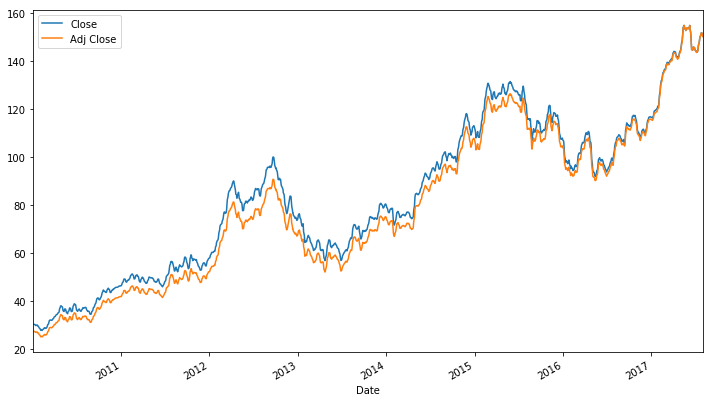

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

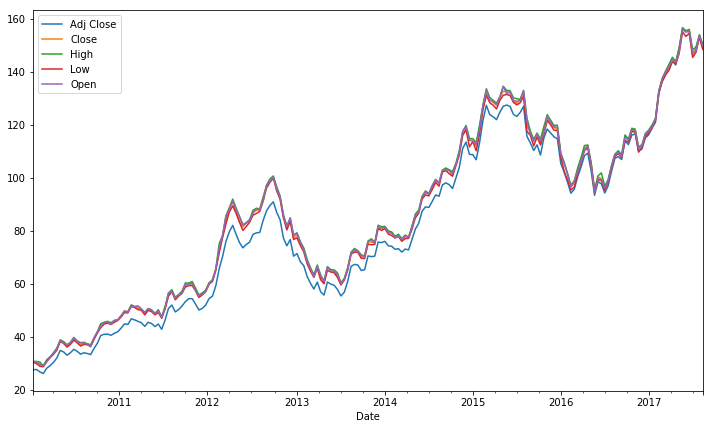

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

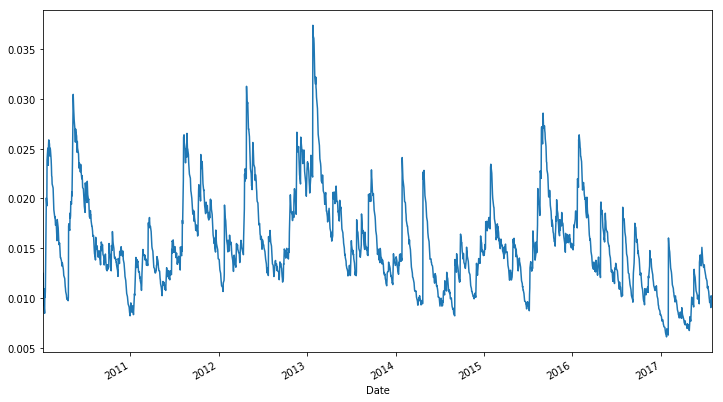

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

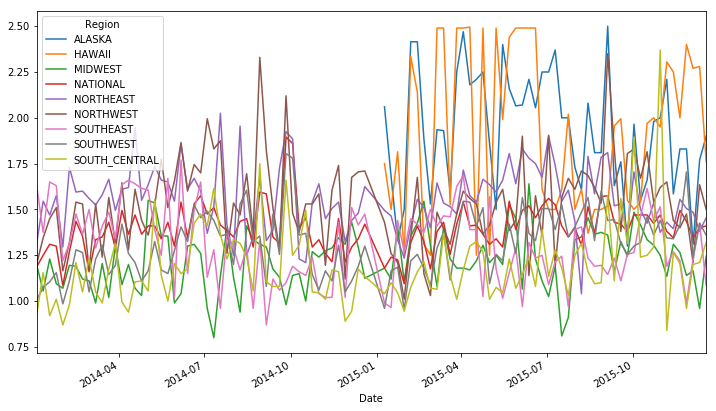

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

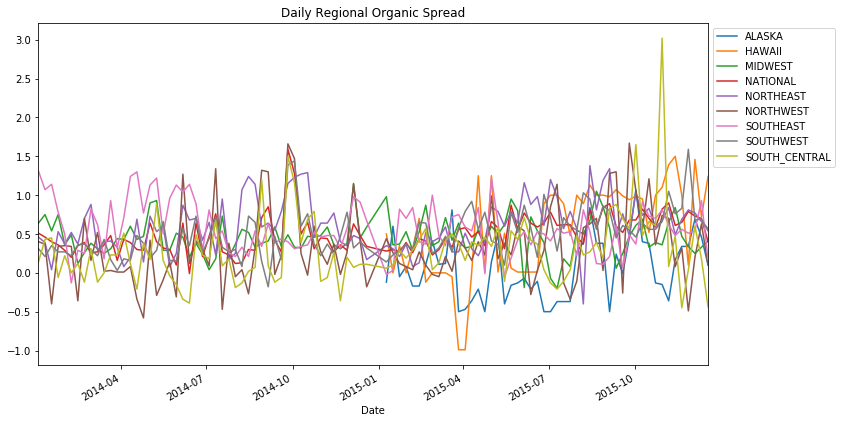

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


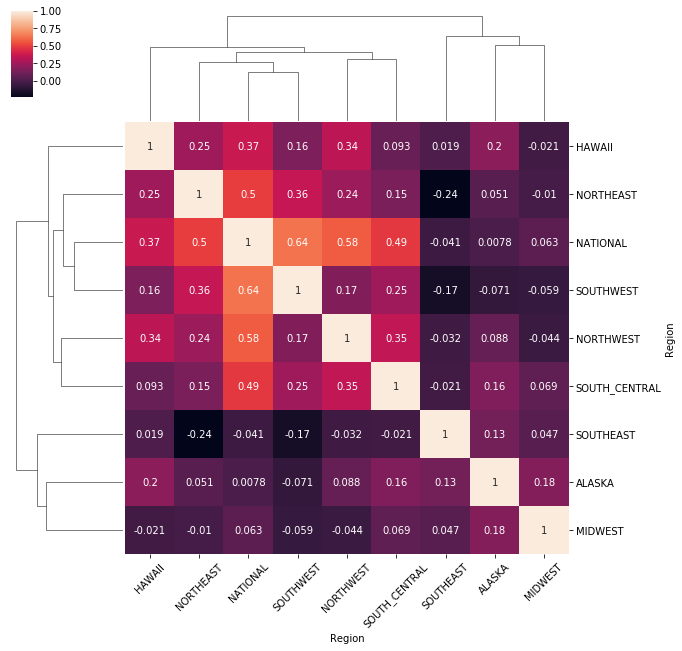

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Análisis: Situación de Desminado Humanitario en Colombia

Dataset: Reporte de los resultados de las operaciones de desminado humanitario que se han realizado en el país desde 2005 al mes anterior de la fecha de corte.

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/Situaci_n_de_Desminado_Humanitario_en_Colombia_20241112.csv'
data = pd.read_csv(file_path)

data.head()


,departamento,codigodanedepartamento,municipio,codigodanemunicipio,ano,mes,tipodesminado,areadespejada,map,muse,aei,totalartefactosdestruidos,organizacion,estudiosnotecnicos,estudiostecnicos,operacionesdespeje,areaspeligrosas,areaspeligrosasconfirmadas
0,CAUCA,19,CALOTO,19142,2018,4,Comunidades,0.0,0,0,0,0,HI,3,0,0,0,0
1,META,50,LA MACARENA,50350,2019,9,Comunidades,1563.0,0,148,0,148,BRDEH,0,0,1,0,0
2,SANTANDER,68,SIMACOTA,68745,2020,7,Comunidades,6499.0,0,0,0,0,BRDEH,0,0,1,0,0
3,TOLIMA,73,RONCESVALLES,73622,2022,10,Comunidades,0.0,0,0,0,0,BRDEH,0,0,0,1,0
4,CAUCA,19,PÁEZ,19517,2023,2,Comunidades,0.0,0,0,0,0,HI,4,0,0,0,0


In [138]:
data.columns

Index(['departamento', 'codigodanedepartamento', 'municipio',
       'codigodanemunicipio', 'ano', 'mes', 'tipodesminado', 'areadespejada',
       'map', 'muse', 'aei', 'totalartefactosdestruidos', 'organizacion',
       'estudiosnotecnicos', 'estudiostecnicos', 'operacionesdespeje',
       'areaspeligrosas', 'areaspeligrosasconfirmadas'],
      dtype='object')

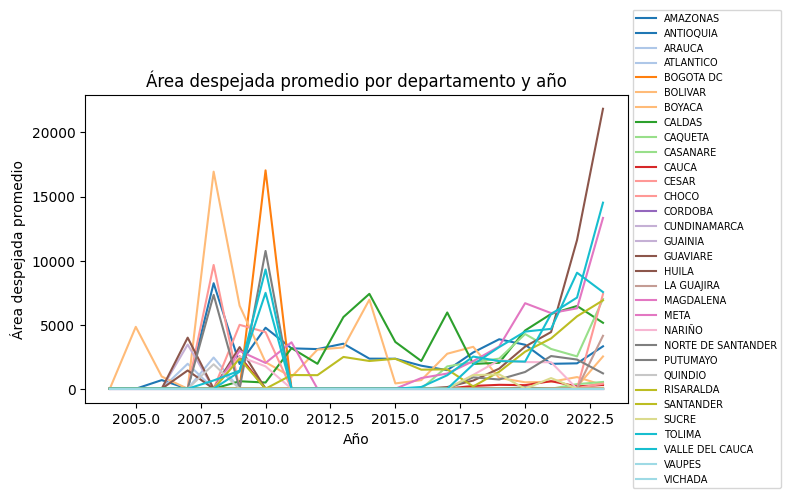

In [152]:

data['Fecha'] = pd.to_datetime(data['ano'].astype(str) + '-' + data['mes'].astype(str) + '-01')

# 1. Área despejada promedio por departamento y año
area_departamento_ano = data.groupby(['departamento', 'ano'])['areadespejada'].mean().unstack().fillna(0)
area_departamento_ano.T.plot(figsize=(7, 4), colormap='tab20', title="Área despejada promedio por departamento y año")
plt.xlabel('Año')
plt.ylabel('Área despejada promedio')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 7})
plt.show()


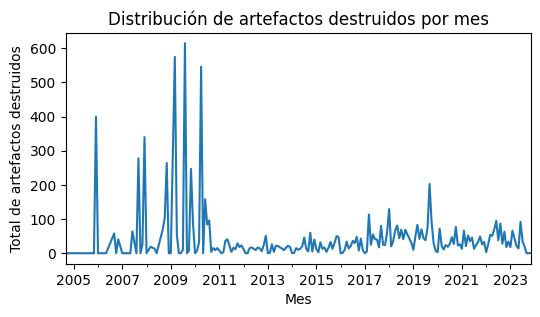

In [143]:
# 2. Distribución de artefactos destruidos por mes
artefactos_por_mes = data.groupby(data['Fecha'].dt.to_period("M"))['totalartefactosdestruidos'].sum()
artefactos_por_mes.plot(figsize=(6, 3), title="Distribución de artefactos destruidos por mes")
plt.xlabel('Mes')
plt.ylabel('Total de artefactos destruidos')
plt.show()

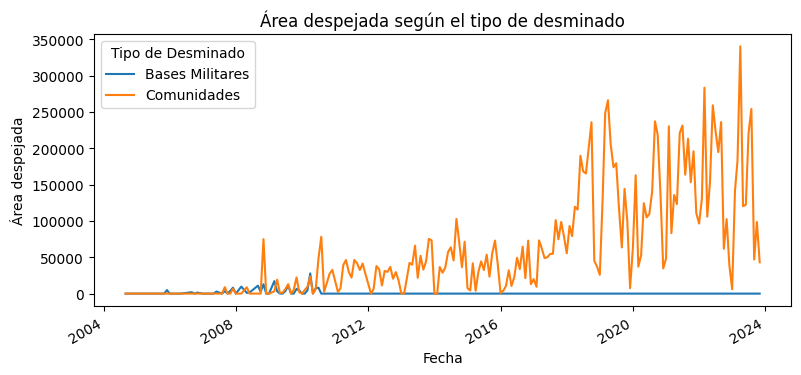

In [145]:
# 3. Diferencias en áreas despejadas según el tipo de desminado
area_por_tipo_desminado = data.groupby(['Fecha', 'tipodesminado'])['areadespejada'].sum().unstack().fillna(0)
area_por_tipo_desminado.plot(figsize=(9, 4), title="Área despejada según el tipo de desminado")
plt.xlabel('Fecha')
plt.ylabel('Área despejada')
plt.legend(title="Tipo de Desminado")
plt.show()

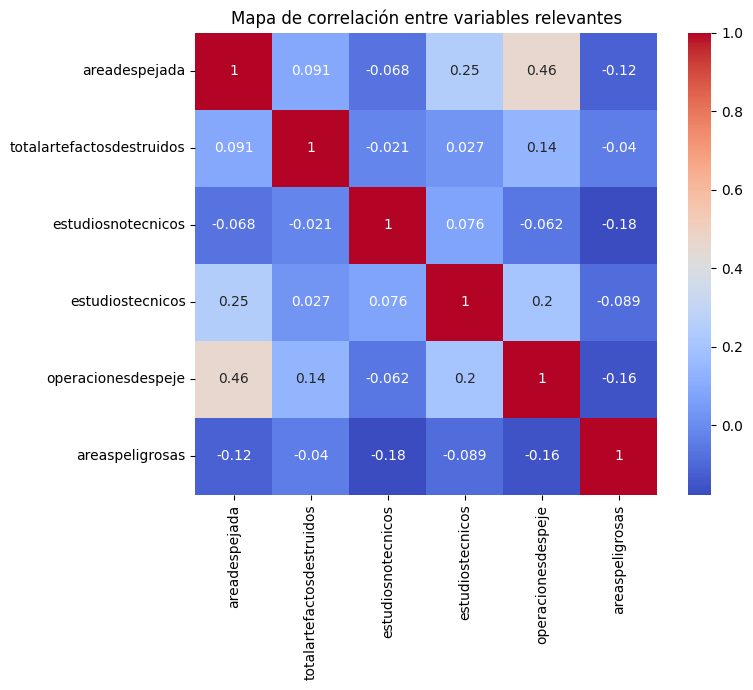

In [148]:
# 4. Mapa de correlación entre variables relevantes
corr = data[['areadespejada', 'totalartefactosdestruidos', 'estudiosnotecnicos',
             'estudiostecnicos', 'operacionesdespeje', 'areaspeligrosas']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True)
plt.title("Mapa de correlación entre variables relevantes")
plt.show()

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!